# Weather's Prediction:

# The Question?

we know that before building any intelligent system, we starting by posing the right question(s), to make in practice, suppose we want to answer the following question
can we predict weather's condition?.

i think in my opinion these is vague and ambiguous question, we must the ask the question that frame the problem very well
(what's target area, city , country, when, what's given data..)
rather than that , in my opinion , 


# can we predict weather's condition  in seattle such  as date, precipitation, temperature's max, temperature's min, 	wind are given(*)?

in my humble opinion the is of multiple rightfull that we can ask bou weather's condition?

# Data's Collection:

we're lucky we don't need to perform  these step, we can download directely from $kaggle$ through the following link
 https://www.kaggle.com/datasets/ananthr1/weather-prediction?resource=download

In [24]:
# packages importing
import numpy as np
import pandas as pd
df=pd.read_csv(r'C:\Users\LG\Downloads\archive.zip',parse_dates=True)
#df.index.freq = "D"
df.tail()


,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [25]:
df["date"]=pd.to_datetime(df["date"])
df['Year'] = df['date'].dt.year 
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df

,date,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30


# Exploration Data Analysis:

as we know the target variable are categorical, so we must encode it using $sklearn$ library

In [26]:
def encoding(df, label):
    from sklearn.preprocessing import LabelEncoder 
    LE=LabelEncoder()
    X=df.iloc[:,:-1] # ==> usually, the labels meight be the last dataset's column
    y=df[label]
    y=LE.fit_transform(y)
    return y

df['weather']=encoding(df, 'weather')



In [10]:
df


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [27]:
# importing packages for EDA

import seaborn as sb 
import pandas as pd 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

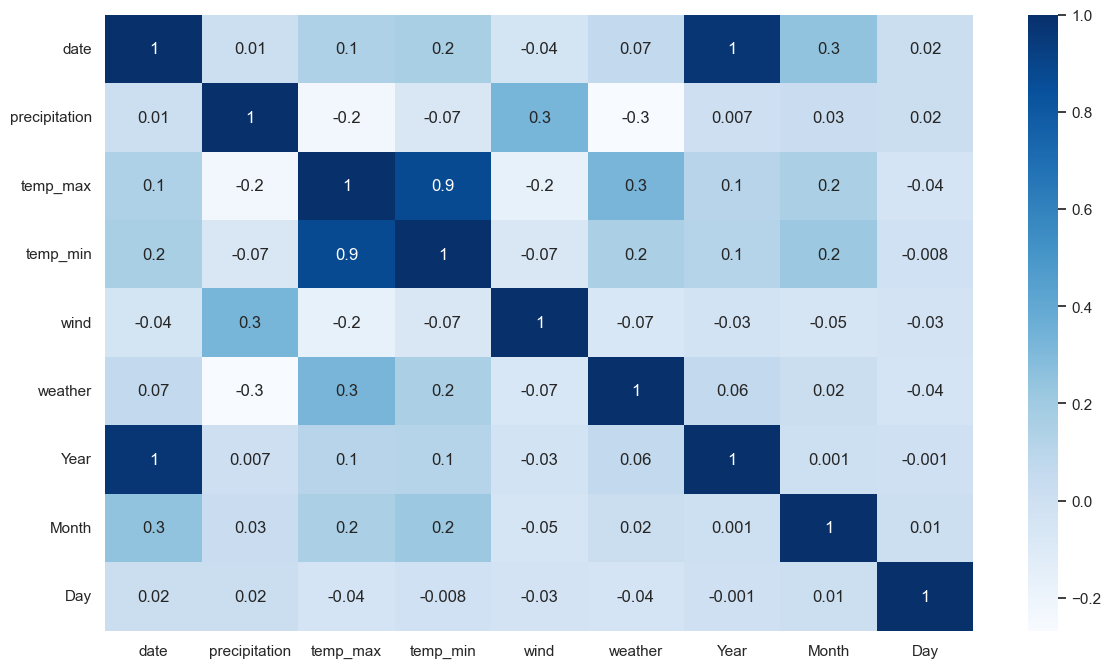

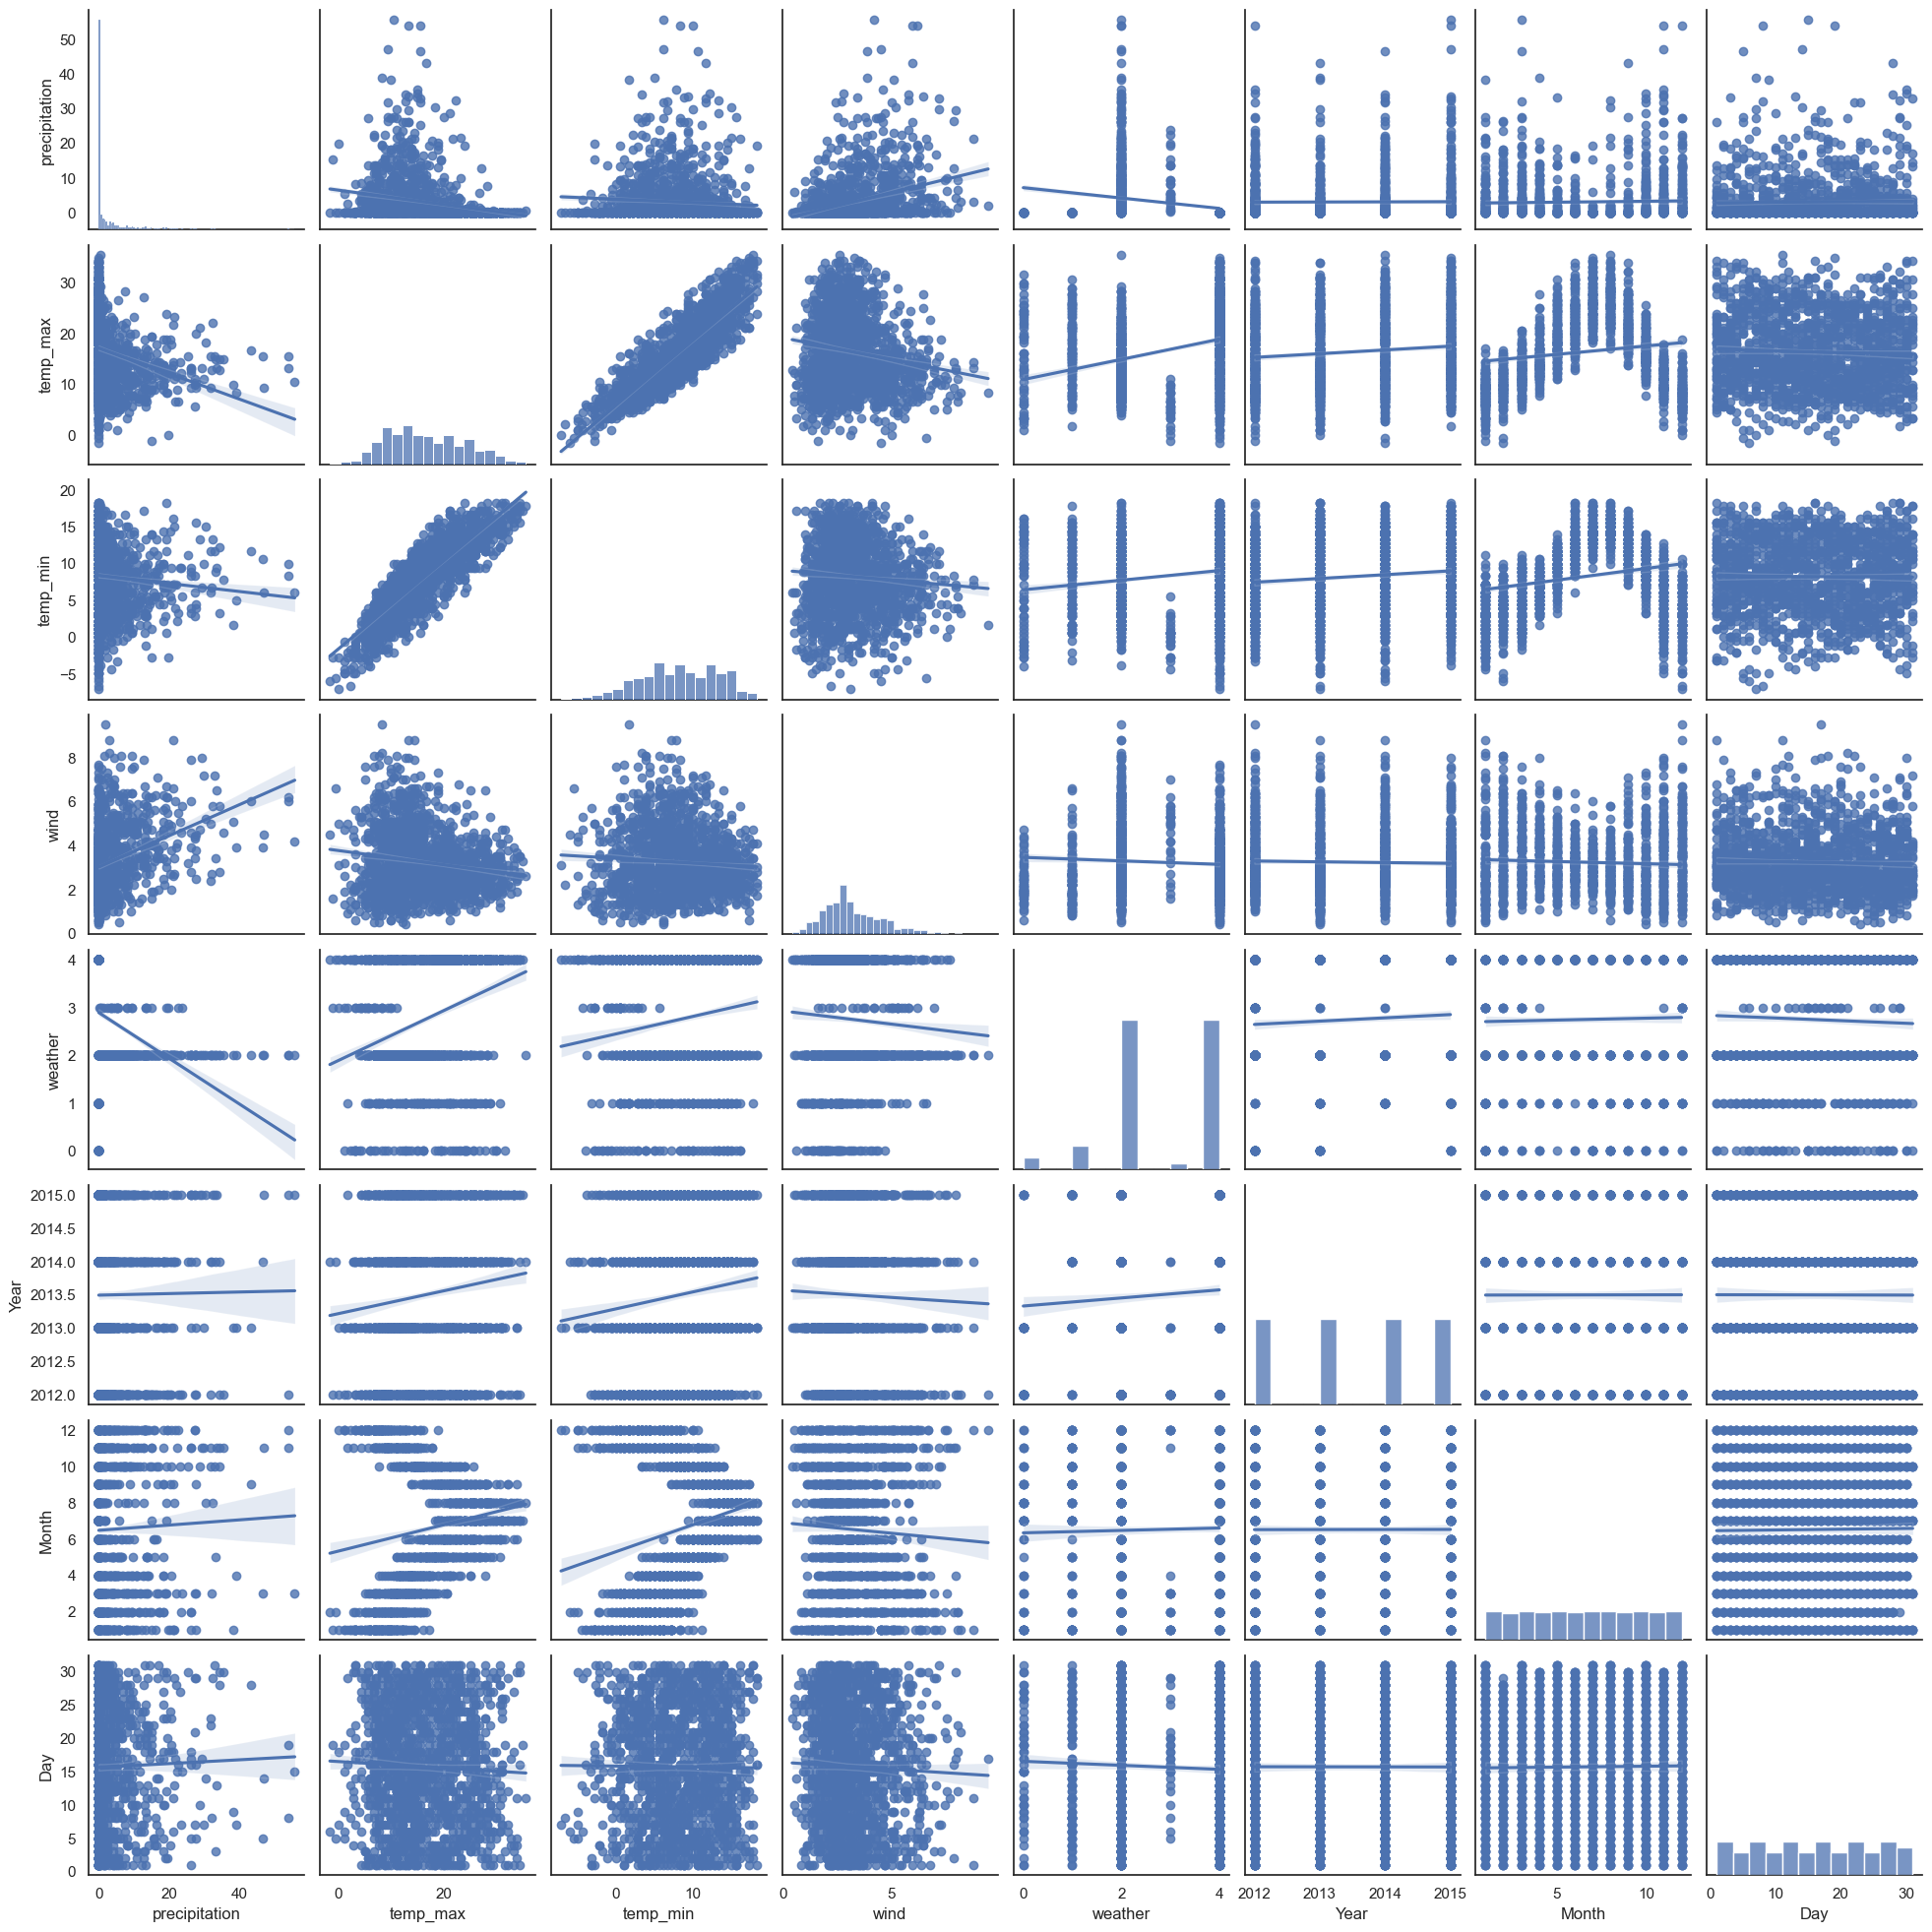

In [28]:
class EDA:
    
    def __init__(self, df):
        self.df=df
        #self.fetures=features
        #self.label=label
        
    def plotting_correlation(self):
        import seaborn as sb
        plt.figure(figsize=(14,8))
        sb.set_theme(style="white")
        corr = self.df.corr()
        heatmap = sb.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
    
    def plotting_hist(self, of_label=True, of_feature=False, Both=False):
        sb.pairplot(self.df, kind="reg")
        
    
    
EDA(df).plotting_correlation()
EDA(df).plotting_hist()

as you can observe, the temp_max and the temp_min are highly correlated(i,e 0.9), so we get rid one of them(e,g temp_max), and year with date are very correlatted:


In [29]:

df.drop(['temp_max','date'], axis=1, inplace=True)
df

,precipitation,temp_min,wind,weather,Year,Month,Day
0,0.0,5.0,4.7,0,2012,1,1
1,10.9,2.8,4.5,2,2012,1,2
2,0.8,7.2,2.3,2,2012,1,3
3,20.3,5.6,4.7,2,2012,1,4
4,1.3,2.8,6.1,2,2012,1,5
...,...,...,...,...,...,...,...
1456,8.6,1.7,2.9,2,2015,12,27
1457,1.5,1.7,1.3,2,2015,12,28
1458,0.0,0.6,2.6,1,2015,12,29
1459,0.0,-1.0,3.4,4,2015,12,30


In [30]:
from sklearn.model_selection import train_test_split
y=df['weather'].to_numpy()

In [31]:
y.shape

(1461,)

In [32]:
df1=df.drop(['weather'], axis=1, inplace=True)

In [33]:
X=df.iloc[:,:].to_numpy()
X

array([[ 0.000e+00,  5.000e+00,  4.700e+00,  2.012e+03,  1.000e+00,
         1.000e+00],
       [ 1.090e+01,  2.800e+00,  4.500e+00,  2.012e+03,  1.000e+00,
         2.000e+00],
       [ 8.000e-01,  7.200e+00,  2.300e+00,  2.012e+03,  1.000e+00,
         3.000e+00],
       ...,
       [ 0.000e+00,  6.000e-01,  2.600e+00,  2.015e+03,  1.200e+01,
         2.900e+01],
       [ 0.000e+00, -1.000e+00,  3.400e+00,  2.015e+03,  1.200e+01,
         3.000e+01],
       [ 0.000e+00, -2.100e+00,  3.500e+00,  2.015e+03,  1.200e+01,
         3.100e+01]])

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, y)
y_train

array([4, 2, 2, ..., 2, 4, 2])

In [90]:
# importing multiple classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score,r2_score

In [97]:
clf_lr=LogisticRegression().fit(X_train, y_train)
y_lr=clf_lr.predict(X_test)
print('accuracy of LR:',accuracy_score(y_test, y_pred))
#####################

accuracy of LR: 0.7540983606557377


C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
clf_RF=RandomForestClassifier().fit(X_train, y_train)
y_RF=clf_RF.predict(X_test)
print('accuracy of RF:',accuracy_score(y_RF, y_test))
#####################

accuracy of RF: 0.8633879781420765


In [75]:
clf_GB=GradientBoostingClassifier().fit(X_train, y_train)
y_GB=clf_GB.predict(X_test)
print('accuracy of GB:',accuracy_score(y_GB, y_test))
#####################

accuracy of GB: 0.8415300546448088


In [78]:
clf_svm = svm.SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train, y_train)
y_svm=clf_svm.predict(X_test)
print('accuracy of svm:',accuracy_score(y_pred, y_test))
#####################

accuracy of svm: 0.7540983606557377


In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5)
CV_RF.fit(X_train, y_train)

C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [84]:
CV_RF.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [89]:
best_RF=RandomForestClassifier(criterion= 'gini', max_depth= 6,max_features= 'auto',n_estimators= 200)
best_clf_RF=RandomForestClassifier().fit(X_train, y_train)
y_RF=best_clf_RF.predict(X_test)
print('accuracy of best_RF:',accuracy_score(y_RF, y_test))

accuracy of best_RF: 0.8633879781420765


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('accuracy of knn', accuracy_score(y_pred, y_test))

accuracy of knn 0.7103825136612022


In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [111]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('accuracy of knn', accuracy_score(y_pred, y_test))

accuracy of knn 0.7459016393442623


In [112]:
clf_RF=RandomForestClassifier().fit(X_train, y_train)
y_RF=clf_RF.predict(X_test)
print('accuracy of RF:',accuracy_score(y_RF, y_test))
#####################

accuracy of RF: 0.8688524590163934


In [114]:
clf_GB=GradientBoostingClassifier().fit(X_train, y_train)
y_GB=clf_GB.predict(X_test)
print('accuracy of GB:',accuracy_score(y_GB, y_test))
#####################

accuracy of GB: 0.8715846994535519


In [115]:
clf_svm = svm.SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train, y_train)
y_svm=clf_svm.predict(X_test)
print('accuracy of svm:',accuracy_score(y_pred, y_test))
#####################

accuracy of svm: 0.7459016393442623


In [117]:
from sklearn.preprocessing import normalize
norm=normalize(X)
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [118]:
clf_svm = svm.SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train, y_train)
y_svm=clf_svm.predict(X_test)
print('accuracy of svm:',accuracy_score(y_pred, y_test))
#####################

accuracy of svm: 0.46994535519125685


In [119]:
clf_RF=RandomForestClassifier().fit(X_train, y_train)
y_RF=clf_RF.predict(X_test)
print('accuracy of RF:',accuracy_score(y_RF, y_test))
#####################

accuracy of RF: 0.8770491803278688


In [120]:
clf_GB=GradientBoostingClassifier().fit(X_train, y_train)
y_GB=clf_GB.predict(X_test)
print('accuracy of GB:',accuracy_score(y_GB, y_test))
#####################

accuracy of GB: 0.8661202185792349


In [121]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('accuracy of knn', accuracy_score(y_pred, y_test))

accuracy of knn 0.73224043715847


# Discretization:

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.tree import DecisionTreeRegressor

enc=KBinsDiscretizer(n_bins=10, encode='onehot')
data=df.to_numpy()
Data_Binned=enc.fit_transform(data)
pd.DataFrame(Data_Binned)

C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\LG\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(


,0
0,"(0, 0)\t1.0\n (0, 7)\t1.0\n (0, 23)\t1.0\n..."
1,"(0, 4)\t1.0\n (0, 6)\t1.0\n (0, 23)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 17)\t1.0\n..."
3,"(0, 4)\t1.0\n (0, 8)\t1.0\n (0, 23)\t1.0\n..."
4,"(0, 1)\t1.0\n (0, 6)\t1.0\n (0, 24)\t1.0\n..."
...,...
1456,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 19)\t1.0\n..."
1457,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 15)\t1.0\n..."
1458,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 19)\t1.0\n..."
1459,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 21)\t1.0\n..."
